# Часть для показа

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [12]:
dir_path = 'needed_data'
data = pd.read_csv(dir_path + "/cinema_data.csv.gz", compression="gzip")
data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [ ]:
user_movie_table = data.pivot_table(index=["title"], columns=["userId"],
                                    values="rating").fillna(0)
user_movie_table.head(10)

userId,1,2,3,4,5,6,7,8,10,11,...,138484,138485,138486,138487,138488,138489,138490,138491,138492,138493
title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: When Nature Calls (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.5,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Across the Sea of Time (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Amazing Panda Adventure, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"American President, The (1995)",0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angela (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angels and Insects (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Anne Frank Remembered (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antonia's Line (Antonia) (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
Assassins (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
query_index = np.random.choice(user_movie_table.shape[0])
print("Choosen Movie is: ", user_movie_table.index[query_index])

Choosen Movie is:  Home for the Holidays (1995)


In [ ]:
user_movie_table_matrix = csr_matrix(user_movie_table.values)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_movie_table_matrix)
distances, indices = model_knn.kneighbors(user_movie_table.iloc[query_index, :].values.reshape(1,-1),
                                          n_neighbors=6)

In [ ]:
movie = []
distance = []

flag = False
for ind, dist in zip(indices.flatten(), distances.flatten()):
    if flag:
        movie.append(user_movie_table.index[ind])
        distance.append(dist)
    else:
        flag = True

m = pd.Series(movie, name='movie')
d = pd.Series(distance, name='distance')
recommend = pd.concat([m, d], axis=1)
recommend = recommend.sort_values('distance', ascending=False)

print('Recommendations for {0}:\n'.format(user_movie_table.index[query_index]))
for i in range(recommend.shape[0]):
    print('{0}: {1}, with distance of {2}'.format(i, recommend["movie"].iloc[i], recommend["distance"].iloc[i]))

Recommendations for Home for the Holidays (1995):

0: Waiting to Exhale (1995), with distance of 0.7833354794227636
1: American President, The (1995), with distance of 0.7821364105044007
2: To Die For (1995), with distance of 0.7564572134961813
3: Brothers McMullen, The (1995), with distance of 0.7544111252512259
4: How to Make an American Quilt (1995), with distance of 0.739039109462466


# Часть для самостоятельной работы

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Сначала мы выполним предобработку данных.

Прочитайте датасет из файла "breast-cancer-wisconsin.data.txt". Переименуйте колонки датасета по приведенному ниже шаблону.

In [ ]:
import pandas as pd

In [ ]:
df = # place for your code
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.head()

Для предсказания нам потребуются только значимые признаки. Поэтому удалите колонку Id из датасета.

In [ ]:
# place for your code

Проверьте, есть ли в датасете данные нечислового формата. Если есть, приведите их к числовому формату. Для этого можно воспользоваться методами dtypes и pandas.to_numeric (дополнительно заполните атрибут errors с параметром 'coerce').

In [ ]:
# place for your code

In [ ]:
# place for your code

Проверьте, содержит ли датасет пропуски. Заполните пропуски вашим любимым способом.

In [ ]:
# place for your code

In [ ]:
# place for your code

За таргет в данных отвечает колонка "Class". Давайте преобразуем значения из этой колонки в более привычный формат (переименуйте классы в 0 и 1).

In [ ]:
# place for your code

In [ ]:
# place for your code

Поместите в X признаки, а в y таргеты. Далее разбейте данные на трейн и тест при помощи метода train_test_split. Долю тренировочной выборки выберите равной 0.25.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# place for your code

In [ ]:
X_train.shape, X_test.shape

((524, 9), (175, 9))

В теории упоминалось, что для корректной работы метрических методов необходимо, чтобы значения признаков в датасете находились в одной шкале. Давайте отшкалируем наши признаки, воспользовавшись алгоритмом StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# place for your code

In [ ]:
X_train = pd.DataFrame("""place for your code""", columns=[X.columns])
X_test = pd.DataFrame("""place for your code""", columns=[X.columns])

Наконец все подготовки завершены. Давайте обучим K-NN со стандартными параметрами и количеством соседей, равным трем.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# place for your code

Сделайте предсказание на тесте.

In [ ]:
# place for your code

Перейдем к метрикам. Нарисуйте матрицу ошибок, воспользовавшись указанным ниже методом.

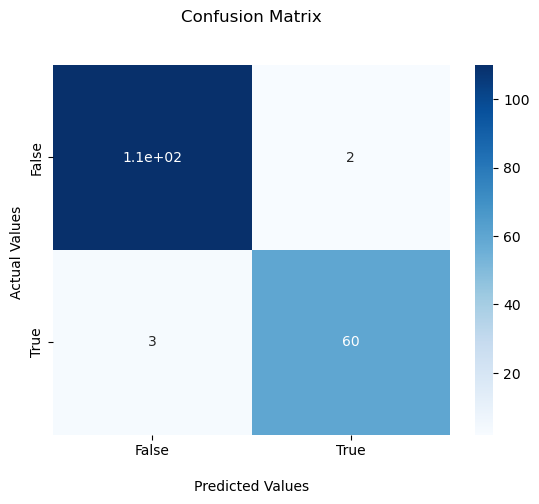

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = # place for your code
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Сколько ошибок первого рода, а сколько второго?

Теперь посчитаем метрики precision, recall и f-меру.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("precision:", """place for your code""")
print("recall:", """place for your code""")
print("f1:", """place for your code""")

precision: 0.967741935483871
recall: 0.9523809523809523
f1: 0.96


Также можно воспользоваться методом classification_report, чтобы вывести все метрики классификации сразу.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# place for your code

Теперь, когда мы знаем, как считать метрики классификации, можно перейти к выбору числа соседей. Как вы помните, это делается при помощи кросс-валидации методом Leave One Out. Давайте будем настраиваться по метрике F1 (f1_macro).

сюда вставить картинку с LOO

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [ ]:
# place for your code

Посчитайте метрику для различного числа соседей от 3 до 10, а потом выведите получившиеся значения в виде графика.

In [ ]:
# place for your code

In [ ]:
# place for your code

В последующих рассчетах будем использовать получившееся пиковое значение.

Давайте теперь поэскпериментируем с различными видами K-NN. Замерим время, которое требуется на обучение модели, и значения метрик для обычного K-NN, KD-Tree, Ball-Tree и K-NN, учитывающего расстояния до объектов. Во всех экспериментах используйте измерение качества при помощи LOO.

In [ ]:
%%time

# standart k-nn

# place for your code

CPU times: total: 703 ms
Wall time: 14.1 s


0.9675572519083969

In [ ]:
%%time

# kd-tree

# place for your code

CPU times: total: 453 ms
Wall time: 2.15 s


0.9675572519083969

In [ ]:
%%time

# ball-tree

# place for your code

CPU times: total: 375 ms
Wall time: 1.92 s


0.9675572519083969

In [ ]:
%%time

# weighted k-nn

# place for your code

CPU times: total: 328 ms
Wall time: 1.98 s


0.9694656488549618